In [1]:
import cv2
import numpy as np
img = cv2.imread('qorentks.jpg')


In [3]:
px = img[100,100]
print (px)

# accessing only blue pixel
blue = img[100,100,0]
print (blue)


[ 76 107 106]
76


In [4]:
img[100,100] = [255,255,255]
print (img[100,100])



[255 255 255]


In [5]:
# accessing RED value
img.item(10,10,2)

# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [6]:
print (img.shape)

(122, 213, 3)


In [7]:
print (img.size)

77958


In [8]:
print (img.dtype)

uint8


In [9]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

ValueError: could not broadcast input array from shape (0,0,3) into shape (0,60,3)

In [ ]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

# or

b = img[:,:,0]


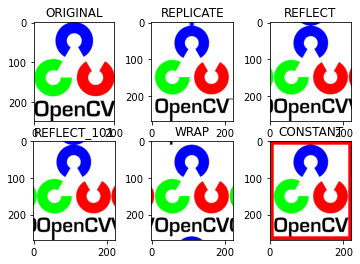

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv2.imread('opencv_logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

In [11]:
x = np.uint8([250])
y = np.uint8([10])
print (cv2.add(x,y)) # 250+10 = 260 => 255

print (x+y) # 250+10 = 260 % 256 = 4


[[255]]
[4]


In [ ]:
img1 = cv2.imread('qorentks.jpg')
img2 = cv2.imread('opencv_logo.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Load two images
img1 = cv2.imread('qorentks.jpg')
img2 = cv2.imread('opencv_logo.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
e1 = cv2.getTickCount()
# your code execution
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()


In [ ]:
img1 = cv2.imread('messi5.jpg')
e1 = cv2.getTickCount()
for i in xrange(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)
# Result I got is 0.521107655 seconds

In [ ]:
# check if optimization is enabled
In [5]: cv2.useOptimized()
Out[5]: True
In [6]: %timeit res = cv2.medianBlur(img,49)
10 loops, best of 3: 34.9 ms per loop
# Disable it
In [7]: cv2.setUseOptimized(False)
In [8]: cv2.useOptimized()
Out[8]: False
In [9]: %timeit res = cv2.medianBlur(img,49)
10 loops, best of 3: 64.1 ms per loop

In [10]: x = 5
In [11]: %timeit y=x**2
10000000 loops, best of 3: 73 ns per loop
In [12]: %timeit y=x*x
10000000 loops, best of 3: 58.3 ns per loop
In [15]: z = np.uint8([5])
In [17]: %timeit y=z*z
1000000 loops, best of 3: 1.25 us per loop
In [19]: %timeit y=np.square(z)
1000000 loops, best of 3: 1.16 us per loop

In [35]: %timeit z = cv2.countNonZero(img)
100000 loops, best of 3: 15.8 us per loop
In [36]: %timeit z = np.count_nonzero(img)
1000 loops, best of 3: 370 us per loop


